# Food Access Programs: Exploratory Analysis

The following project aims to understant food access challenges throughout US. Why is this important? There is substantial research linking poor nutrition with poor health outcomes. This is particularly true in patients with chronic diseases such as diabetes or heart disease. Poor nutrition is caused not only for the lack of food but for the excess of unhealthy food that leads to obesity which leads to other health problems. 
The aim is to address questions such as:

- Where should a food access program be deployed?
- Which segment of the population might benefit the most from the program?
- What do we know about potential impact on medical costs or utilization?

There dataset includes information at the county level about more than 500 variables. Those variables are related to access to food stores, access to food programs, poverty level, diet-related conditions  (diabesity = diabetes and obesity), race distribution, and many medicare related variables.  
The analysis was centered on the health outcomes diabetes and obesity as a main indicators. 
Those indicators were used to address questions of where, who and also to predict general economical impact on medical expenses.

### Data sources: 

FDA – Food Atlas - https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/

CMS – State/County Medicare Utilization Summary - https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Geographic-Variation/GV_PUF

### Note:

The data from both sources has been pre-process because of size. Only variables that I thougth could impact "diabesity" were included. 

## Data Cleaning & Exploring 

The first step in the pipeline after importing is exploring the data. 
In this case and in the interest of time, I will do a limited version and focus the exploration to few columns. 
I will focus the analysis at the markers or proxis that may be associated obesity and diabetes (PCT_OBESE_ADULTS17 = Adult obesity rate, 2017 and PCT_DIABETES_ADULTS13 = Adult diabetes rate, 2009 ). 
Following a preliminar review of the literature, the parameters to consider are:

   1) parameters related to access to food (location, household resources,goverment programs..)

   2) parameters related to scioeconomic status (race, income level..)

   3) parameters related to insecurity (race, poverty level..)

   4) parameters related to assistance (lunch programs, ..)

   5) parameters related to cost (total cost, total standarized cost..)


In [1]:
# Import the necesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import re

In [2]:
# Import the data 

df_food = pd.read_csv('assets/data_all_df.csv')
df_cost = pd.read_csv('assets/data_cost_df.csv')
df_food.head(5)

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,FSR11,FSR16,PCH_FSR_11_16,FSRPTH11,FSRPTH16,PCH_FSRPTH_11_16,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,32,31,-3.125000,0.579721,0.560802,-3.263448,649.511367,674.80272,484.381507,512.280987
1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,216,236,9.259259,1.157966,1.137300,-1.784662,649.511367,674.80272,484.381507,512.280987
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,17,14,-17.647059,0.621549,0.543183,-12.608237,649.511367,674.80272,484.381507,512.280987
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,5,7,40.000000,0.219829,0.309283,40.692794,649.511367,674.80272,484.381507,512.280987
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,15,12,-20.000000,0.260589,0.208471,-20.000000,649.511367,674.80272,484.381507,512.280987


In [3]:
# merge dataframes on FIPS number

df_all= pd.merge(df_food, df_cost, on = 'FIPS', how='inner')


In [4]:
# Create a dataframe of values that are most interesting to food insecurity

columns_general = ['FIPS', 'State', 'County', "PCT_OBESE_ADULTS17", "PCT_DIABETES_ADULTS13"]

columns_access = ['LACCESS_POP10', 'LACCESS_POP15', 'PCH_LACCESS_POP_10_15',
                  'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
                  'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15',
                  'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15',
                  'LACCESS_HHNV10', 'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15',
                  'PCT_LACCESS_HHNV10', 'PCT_LACCESS_HHNV15',
                  'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
                  'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
                  'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15',
                  'LACCESS_SENIORS10', 'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
                  'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15',
                  'LACCESS_WHITE15', 'PCT_LACCESS_WHITE15',
                  'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
                  'LACCESS_HISP15', 'PCT_LACCESS_HISP15',
                  'LACCESS_NHASIAN15', 'PCT_LACCESS_NHASIAN15',
#                   'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15',
#                   'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15',
#                   'LACCESS_MULTIR15', 'PCT_LACCESS_MULTIR15'
                 ]
                  
columns_soc = ['PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
               'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC15', 'POVRATE15','PERPOV10',
               'CHILDPOVRATE15', 'METRO13'] 
 
columns_insec = ['FOODINSEC_15_17','VLFOODSEC_15_17']

columns_assis = ['PCT_SNAP17','SNAP_PART_RATE16','PCT_FREE_LUNCH15','PCT_REDUCED_LUNCH15', 'PCT_WIC17']

columns_stores = ['GROCPTH16','SUPERCPTH16', 'FMRKT18','FMRKTPTH18','PCT_FMRKT_FRVEG18']

columns_cost = ['Total_Actual_Costs','Total_Standardized_Costs','Part_B_Drugs_Per_Capita_Actual_Costs' ]

dfcolumns = columns_general + columns_cost + columns_access + columns_soc + columns_insec + columns_assis + columns_stores


In [5]:
df = df_all[dfcolumns]


### Data description


In [6]:
# show dimensions
df.shape

(3139, 68)

In [7]:
# show statistics
df.describe()

,FIPS,PCT_OBESE_ADULTS17,PCT_DIABETES_ADULTS13,Total_Actual_Costs,Total_Standardized_Costs,Part_B_Drugs_Per_Capita_Actual_Costs,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,...,PCT_SNAP17,SNAP_PART_RATE16,PCT_FREE_LUNCH15,PCT_REDUCED_LUNCH15,PCT_WIC17,GROCPTH16,SUPERCPTH16,FMRKT18,FMRKTPTH18,PCT_FMRKT_FRVEG18
count,3139.000000,3139.000000,3138.000000,3.137000e+03,3.137000e+03,3130.000000,3139.000000,3120.000000,3.113000e+03,3139.000000,...,3139.000000,3139.000000,2851.000000,2851.000000,3139.000000,3139.000000,3139.000000,3138.000000,3136.000000,3138.000000
mean,30422.233514,31.863300,11.239420,8.732135e+07,8.388858e+07,240.635735,20181.674607,19311.690124,7.189226e+03,23.572985,...,12.892616,84.013519,46.287351,7.292698,2.141910,0.244146,0.018278,2.759720,0.059362,46.799655
std,15146.842130,3.327493,2.484679,2.496103e+08,2.222455e+08,102.281130,51336.760925,47829.480999,3.958217e+05,20.255894,...,3.172177,9.220965,18.850155,3.711950,0.407929,0.216498,0.022465,5.822495,0.100303,44.057583
min,1001.000000,22.600000,3.300000,1.523781e+05,1.514347e+05,2.390000,0.000000,0.000000,-1.000000e+02,0.000000,...,5.668505,56.037000,0.000000,0.000000,0.972890,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18592.000000,30.100000,9.500000,1.332851e+07,1.375123e+07,169.850000,1670.056660,1633.574168,-1.094684e+01,10.863325,...,10.400643,76.151000,32.981880,5.093931,1.858326,0.133085,0.000000,0.000000,0.000000,0.000000
50%,29181.000000,32.400000,11.100000,2.879557e+07,2.958294e+07,234.590000,4105.849208,4132.804748,-6.328229e-02,19.685956,...,13.290553,84.002000,44.186376,7.305035,2.126099,0.186145,0.014667,1.000000,0.030040,50.000000
75%,45084.000000,33.800000,12.900000,6.766296e+07,6.891611e+07,297.932500,12966.990813,13174.899203,7.262080e+00,29.587789,...,14.702413,90.379000,56.035524,9.394956,2.422094,0.279999,0.029283,3.000000,0.071691,100.000000
max,56045.000000,38.100000,23.500000,6.508951e+09,5.461119e+09,1374.420000,886068.668386,740267.412661,2.208376e+07,100.000001,...,22.055479,100.000000,100.000000,35.714286,2.903674,3.267974,0.250752,124.000000,1.472754,100.000000


### Cleaning data

First, erase rows with duplicate entries, ie same exact value for two years, 2010 and 2015.  
Then, erase missing values and -9999


In [8]:
# erase the rows that have duplicate data on different years.
# by detecting when the difference is 0

check = df[df['PCH_LACCESS_POP_10_15'] == 0]
check.head()

,FIPS,State,County,PCT_OBESE_ADULTS17,PCT_DIABETES_ADULTS13,Total_Actual_Costs,Total_Standardized_Costs,Part_B_Drugs_Per_Capita_Actual_Costs,LACCESS_POP10,LACCESS_POP15,...,PCT_SNAP17,SNAP_PART_RATE16,PCT_FREE_LUNCH15,PCT_REDUCED_LUNCH15,PCT_WIC17,GROCPTH16,SUPERCPTH16,FMRKT18,FMRKTPTH18,PCT_FMRKT_FRVEG18
24,1049,AL,DeKalb,36.3,13.4,85035475.71,91486266.08,329.43,2679.852662,2679.852662,...,16.500056,86.898,55.351882,5.008183,2.543570,0.224669,0.014042,2.0,0.028017,0.0
72,2068,AK,Denali,34.2,5.8,353551.94,297993.57,121.80,1826.000014,1826.000014,...,12.045578,71.454,0.000000,0.000000,2.458541,0.488998,0.000000,0.0,0.000000,0.0
87,2230,AK,Skagway,34.2,6.4,NaN,NaN,NaN,2.999954,2.999954,...,12.045578,71.454,0.000000,0.000000,2.458541,0.000000,0.000000,0.0,0.000000,0.0
152,5089,AR,Marion,35.0,12.2,22886372.90,24905879.91,125.67,2255.376704,2255.376704,...,12.926965,72.327,62.897146,12.224017,2.546984,0.183273,0.061091,1.0,0.059801,100.0
155,5095,AR,Monroe,35.0,17.2,12678686.40,13115163.70,402.29,1020.247645,1020.247645,...,12.926965,72.327,91.184328,4.541407,2.546984,0.414651,0.000000,0.0,0.000000,0.0


In [9]:
# similarly for other pair of values from 2010 and 2015: erase when diference is 0.00
df = df[df['PCH_LACCESS_POP_10_15'] != 0]
df = df[df['PCH_LACCESS_HHNV_10_15'] != 0]
df = df[df['PCH_LACCESS_SENIORS_10_15'] != 0]

In [10]:
# drop columns that may not be as relevant

delete_list = ['LACCESS_POP10','PCH_LACCESS_POP_10_15','PCT_LACCESS_POP10',
               'LACCESS_LOWI10','PCH_LACCESS_LOWI_10_15','PCT_LACCESS_LOWI10',
               'LACCESS_HHNV10','PCH_LACCESS_HHNV_10_15','PCT_LACCESS_HHNV10',
               'LACCESS_CHILD10','LACCESS_CHILD_10_15','PCT_LACCESS_CHILD10', 
               'LACCESS_SENIORS10', 'PCH_LACCESS_SENIORS_10_15','PCT_LACCESS_SENIORS10']


for column in delete_list:
    del df[column]
    
# df.head()

In [11]:
# remove NaNs, 0s , and -9999
df = df.dropna(how='any')

df = df[df[df.columns] != -9999]


In [12]:
# show dimensions
df.shape

(2567, 53)

## Explore data

To inspect the data first I am checking for the different variables or features to see which ones may have interesting distributions

### Visualizations

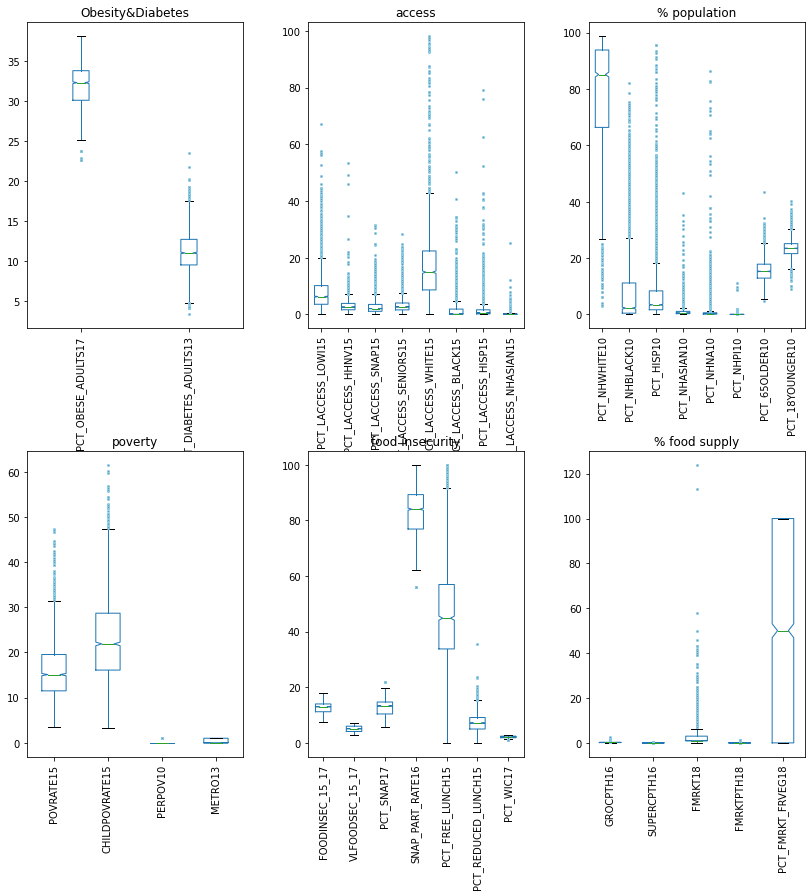

In [13]:
# Inspect the data: subset at the % level 
# Boxplot:distribution of % values

sb11=['PCT_OBESE_ADULTS17','PCT_DIABETES_ADULTS13']
sb12=['PCT_LACCESS_LOWI15','PCT_LACCESS_HHNV15',
     'PCT_LACCESS_SNAP15','PCT_LACCESS_SENIORS15',
     'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15','PCT_LACCESS_HISP15',
     'PCT_LACCESS_NHASIAN15']
sb13=['PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10',
     'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
     'PCT_65OLDER10','PCT_18YOUNGER10']
sb14=['POVRATE15', 'CHILDPOVRATE15', 'PERPOV10',
     'METRO13']
sb15=['FOODINSEC_15_17','VLFOODSEC_15_17','PCT_SNAP17',
     'SNAP_PART_RATE16','PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15',
     'PCT_WIC17']
sb16=['GROCPTH16','SUPERCPTH16', 'FMRKT18',
      'FMRKTPTH18','PCT_FMRKT_FRVEG18']


fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(12, 12))

flierprops = dict(marker = 'o', markerfacecolor = 'grey', 
                  markeredgecolor = 'skyblue',markersize = 2,
                  linestyle = 'none')

axes[0, 0].boxplot= df.boxplot(sb11,ax=axes[0,0],grid=False,
                             rot=90, notch=True,flierprops=flierprops)
axes[0, 0].set_title('Obesity&Diabetes')

axes[0,1].boxplot = df.boxplot(sb12,grid=False, ax=axes[0,1],
                             rot=90, notch=True,flierprops=flierprops)
axes[0,1].set_title('access')

axes[0,2].boxplot =df.boxplot(sb13,grid=False, ax=axes[0,2],
                             rot=90, notch=True,flierprops=flierprops)
axes[0,2].set_title('% population')

axes[1,0].boxplot = df.boxplot(sb14,grid=False, ax=axes[1,0],
                             rot=90, notch=True,flierprops=flierprops)
axes[1,0].set_title('poverty')

axes[1,1].boxplot = df.boxplot(sb15,grid=False,ax=axes[1,1], 
                             rot=90, notch=True,flierprops=flierprops)
axes[1,1].set_title('food insecurity')

axes[1,2].boxplot = df.boxplot(sb16,grid=False, ax=axes[1,2],
                             rot=90, notch=True,flierprops=flierprops)
axes[1,2].set_title('% food supply')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# save the plot                              
plt.savefig('assets/distribPerc.png')                             

plt.show()                                                    

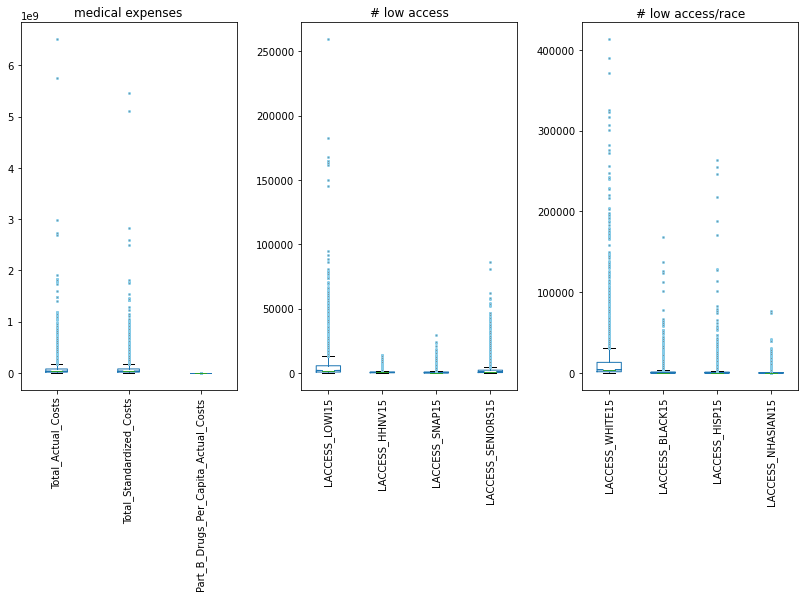

In [23]:
# Boxplot: distribution of variables including the total count per county

sb2=['PCT_OBESE_ADULTS17','PCT_DIABETES_ADULTS13',
     'Total_Actual_Costs','Total_Standardized_Costs','Part_B_Drugs_Per_Capita_Actual_Costs',
     'LACCESS_LOWI15','LACCESS_HHNV15',
     'LACCESS_SNAP15','LACCESS_SENIORS15',
     'LACCESS_WHITE15', 'LACCESS_BLACK15','LACCESS_HISP15',
     'LACCESS_NHASIAN15',
     'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10',
     'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',     
     'PCT_65OLDER10','PCT_18YOUNGER10','MEDHHINC15',
     'POVRATE15', 'PERPOV10','CHILDPOVRATE15',
     'METRO13','FOODINSEC_15_17','VLFOODSEC_15_17','PCT_SNAP17',
     'SNAP_PART_RATE16','PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15',
     'PCT_WIC17',
     'GROCPTH16','SUPERCPTH16', 'FMRKT18','FMRKTPTH18','PCT_FMRKT_FRVEG18']

sb21 = ['Total_Actual_Costs','Total_Standardized_Costs','Part_B_Drugs_Per_Capita_Actual_Costs']
sb22 = ['LACCESS_LOWI15','LACCESS_HHNV15','LACCESS_SNAP15','LACCESS_SENIORS15']
sb23 = ['LACCESS_WHITE15','LACCESS_BLACK15','LACCESS_HISP15','LACCESS_NHASIAN15']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(12, 6))

flierprops = dict(marker = 'o', markerfacecolor = 'grey', 
                  markeredgecolor = 'skyblue',markersize = 2,
                  linestyle ='none')

axes[0].boxplot= df.boxplot(sb21, grid = False, ax = axes[0],
                             rot = 90, notch = True, flierprops = flierprops)
axes[0].set_title('medical expenses')

axes[1].boxplot = df.boxplot(sb22, grid = False, ax = axes[1],
                             rot=90, notch = True, flierprops = flierprops)
axes[1].set_title('# low access')

axes[2].boxplot =df.boxplot(sb23, grid = False, ax = axes[2],
                             rot = 90, notch = True, flierprops = flierprops)
axes[2].set_title('# low access/race')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)                            
                             
plt.show()


## Detecting outlayers

Detecting outlayers and deciding if they are the extreme cases that we are looking for or oulayers or artifacts.

### Note: 

Some of the data required a more detailed analysis. 

For example,the percent of Households with very low food security (three-years average 2015-17), 'PCT_LACCESS_POP15' have values of percent that are almost 100%, which seems an artifact.


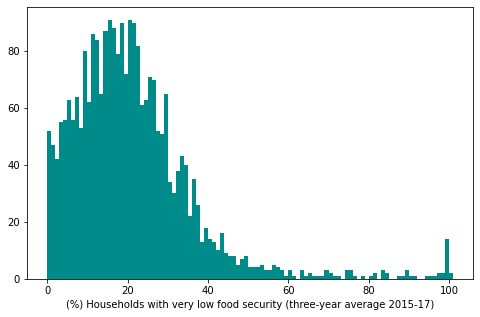

In [24]:
# distribution of values

binsize = 1
bins = np.arange(0, df['PCT_LACCESS_POP15'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'PCT_LACCESS_POP15', bins = bins, color="darkcyan")
plt.xlabel('(%) Households with very low food security (three-year average 2015-17)')
plt.show()

In [25]:
# However the poverty rate of those counties with 'PCT_LACCESS_POP15' close to 100%
# have poverty rates that are reasonable

check = df.loc[df['PCT_LACCESS_POP15'] > 99,("State",'County','POVRATE15','PCT_LACCESS_POP15')]
print (check.count())
check.head()

State                16
County               16
POVRATE15            16
PCT_LACCESS_POP15    16
dtype: int64


,State,County,POVRATE15,PCT_LACCESS_POP15
81,AK,Lake and Peninsula,19.3,99.858101
258,CO,Dolores,14.9,100.000000
930,KS,Kearny,11.5,100.000000
983,KS,Wallace,12.4,100.000000
1372,MN,Red Lake,9.7,99.192363


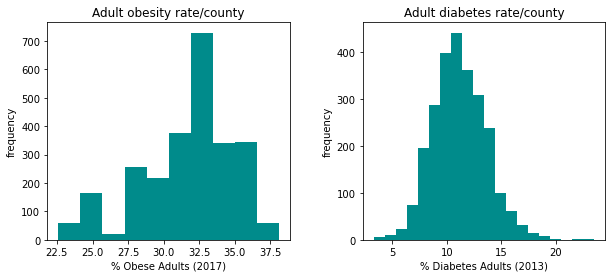

In [27]:
# visualizations 
# Histograms of the output variables: diabetes and obesity rate 

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df.hist('PCT_OBESE_ADULTS17', bins=10,ax=axes[0],color='darkcyan', grid = False)
df.hist('PCT_DIABETES_ADULTS13', bins=20,ax=axes[1],color='darkcyan', grid = False)
axes[0].set(title='Adult obesity rate/county',xlabel='% Obese Adults (2017)', ylabel='frequency' )
axes[1].set(title='Adult diabetes rate/county',xlabel='% Diabetes Adults (2013)', ylabel='frequency')
plt.show()

In [28]:
df['PCT_OBESE_ADULTS17'].unique()

array([36.3, 34.2, 29.5, 35. , 25.1, 22.6, 26.9, 31.8, 22.9, 28.4, 31.6,
       23.8, 29.3, 31.1, 33.6, 36.4, 32.4, 34.3, 36.2, 29.1, 31.3, 32.3,
       37.3, 32.5, 25.3, 32.8, 26.7, 28.1, 27.3, 25.7, 32.1, 33.2, 33.8,
       36.5, 29.4, 30. , 34.1, 31.9, 33. , 27.6, 30.1, 27.7, 38.1, 32. ,
       28.8])


Clearly the data for the percent of obese adults has a questionable distribution. The reason is that there is a unique value per state assigned to all counties.

The data for the percent of adults sufering from diabetes has a more reasonable distribution. I think that it is a better variable for health outcome. 

### Bivariant Exploration

I am checking correlations at % of population. 
I am also checking similar correlations at the population level. 
If they differ we may want to consider if we want to look to impact the greatest number of places or the impact the 
maximun number of people.

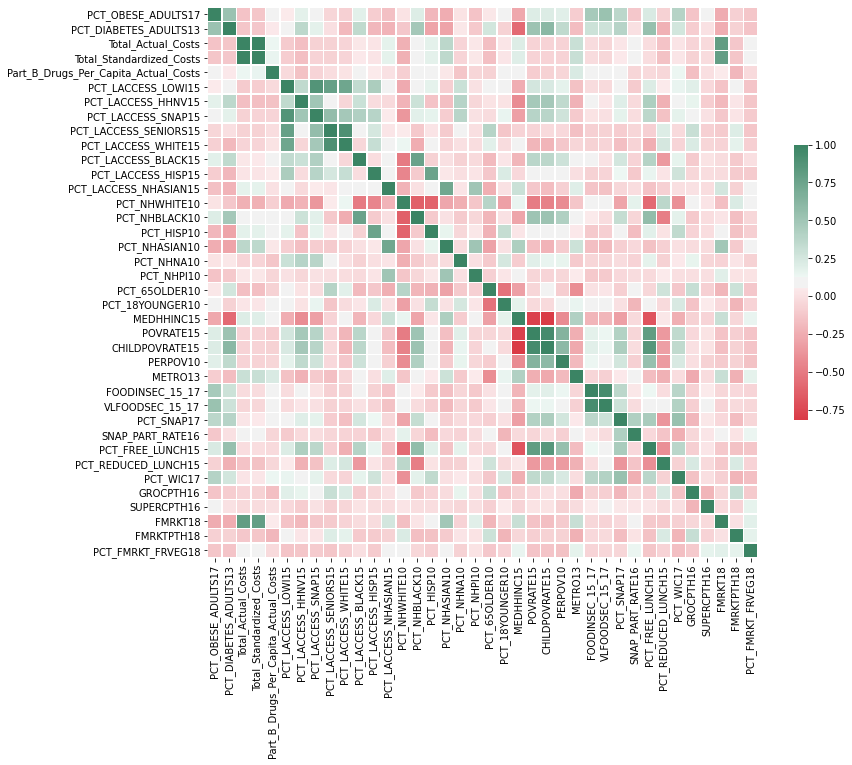

In [36]:
# using Pearson Correlation
# correlation matrix with percent per county for some of the variables 

sb1=['PCT_OBESE_ADULTS17','PCT_DIABETES_ADULTS13',
     'Total_Actual_Costs','Total_Standardized_Costs','Part_B_Drugs_Per_Capita_Actual_Costs',
     'PCT_LACCESS_LOWI15','PCT_LACCESS_HHNV15',
     'PCT_LACCESS_SNAP15','PCT_LACCESS_SENIORS15',
     'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15','PCT_LACCESS_HISP15',
     'PCT_LACCESS_NHASIAN15',
     'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10',
     'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
     'PCT_65OLDER10','PCT_18YOUNGER10','MEDHHINC15',
     'POVRATE15', 'CHILDPOVRATE15', 'PERPOV10',
     'METRO13','FOODINSEC_15_17','VLFOODSEC_15_17','PCT_SNAP17',
     'SNAP_PART_RATE16','PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15',
     'PCT_WIC17',
     'GROCPTH16','SUPERCPTH16','FMRKT18','FMRKTPTH18','PCT_FMRKT_FRVEG18',     
    ]

corr_perc = df[sb1].corr()

# Set up  matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap from red to blue
cmap = sns.diverging_palette(10, 150, as_cmap=True)

sns.heatmap(corr_perc, cmap = cmap,
            square=True,
            linewidth=.5, cbar_kws={"shrink": .5}, ax=ax,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
# save the plot
plt.savefig('assets/correlationPerc.png')

plt.show()

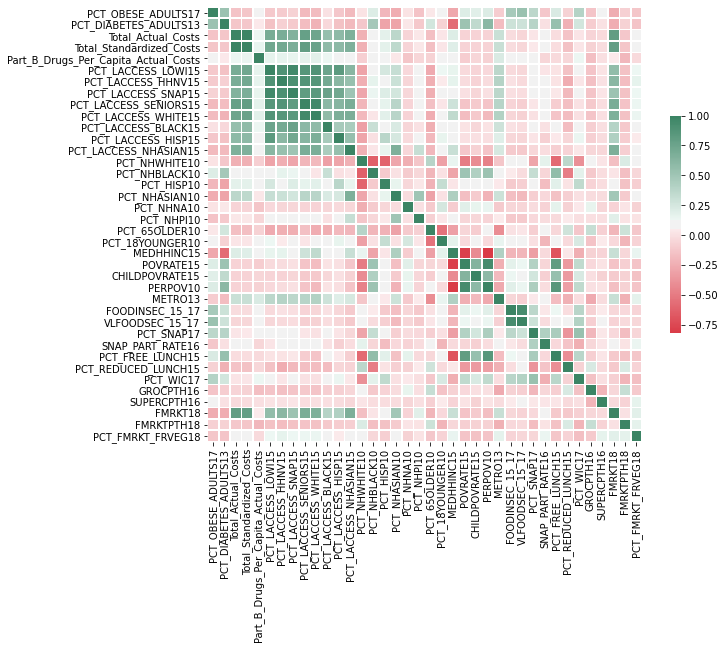

In [37]:
# Looking at the correlations total number instead of % for some of the variables 

sb2=['PCT_OBESE_ADULTS17','PCT_DIABETES_ADULTS13',
     'Total_Actual_Costs','Total_Standardized_Costs','Part_B_Drugs_Per_Capita_Actual_Costs',
     'LACCESS_LOWI15','LACCESS_HHNV15',
     'LACCESS_SNAP15','LACCESS_SENIORS15',
     'LACCESS_WHITE15', 'LACCESS_BLACK15','LACCESS_HISP15',
     'LACCESS_NHASIAN15',
     'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10',
     'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',     
     'PCT_65OLDER10','PCT_18YOUNGER10','MEDHHINC15',
     'POVRATE15', 'PERPOV10','CHILDPOVRATE15',
     'METRO13','FOODINSEC_15_17','VLFOODSEC_15_17','PCT_SNAP17',
     'SNAP_PART_RATE16','PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15',
     'PCT_WIC17',
     'GROCPTH16','SUPERCPTH16', 'FMRKT18','FMRKTPTH18','PCT_FMRKT_FRVEG18']

corr_popul = df[sb2].corr()

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Add diverging colormap from red to blue
cmap = sns.diverging_palette(10, 150, as_cmap=True)

sns.heatmap(corr_popul, cmap=cmap,
            square=True,
            linewidth=.5, cbar_kws={"shrink": .5}, ax=ax,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)  

plt.savefig('assets/correlationCount.png')

plt.show()


###  Correlations with the target variables

Check what are the variables that seem to have highest correlation with 'Diabesity'

In [40]:
# correlation with output variable: Adult Diabetes Rate (2013)
corr_target = abs(corr_popul['PCT_DIABETES_ADULTS13'])

# Selecting highly correlated features
relevant_features = corr_target[corr_target > 0.4]
relevant_features

PCT_OBESE_ADULTS17       0.524572
PCT_DIABETES_ADULTS13    1.000000
PCT_NHBLACK10            0.481970
MEDHHINC15               0.572771
POVRATE15                0.519172
CHILDPOVRATE15           0.608061
PCT_FREE_LUNCH15         0.547215
Name: PCT_DIABETES_ADULTS13, dtype: float64

In [45]:
# correlation with output variable: Adult Obesity Rate (2017)
corr_target = abs(corr_popul['PCT_OBESE_ADULTS17'])

# Selecting highly correlated features
relevant_features = corr_target[corr_target > 0.5]
relevant_features

PCT_OBESE_ADULTS17       1.000000
PCT_DIABETES_ADULTS13    0.524572
VLFOODSEC_15_17          0.536460
Name: PCT_OBESE_ADULTS17, dtype: float64

From these correlation coeficients we can see that poverty rate, POVRATE15, child poverty rate, CHILDPOVRATE15, percent of students eligible for free lunch , PCT_FREE_LUNCH15 and median household income, MEDHHINC15, and obesity are correlated with the adult diabetes rate.

In addition, the PCT_DIABETES_ADULTS13 - adult diabetes rate - and VLFOODSEC_15_17 - household very low food security (%, three-year average 2015-17)- are highly correlated.


In [44]:
# Diabetes variables: These variables are highly correlated

print(df[["PCT_DIABETES_ADULTS13","VLFOODSEC_15_17"]].corr())
print(df[["CHILDPOVRATE15","POVRATE15"]].corr())
print(df[["CHILDPOVRATE15","PCT_FREE_LUNCH15"]].corr())
print(df[["CHILDPOVRATE15","MEDHHINC15"]].corr())

                       PCT_DIABETES_ADULTS13  VLFOODSEC_15_17
PCT_DIABETES_ADULTS13               1.000000         0.283953
VLFOODSEC_15_17                     0.283953         1.000000
                CHILDPOVRATE15  POVRATE15
CHILDPOVRATE15        1.000000   0.937753
POVRATE15             0.937753   1.000000
                  CHILDPOVRATE15  PCT_FREE_LUNCH15
CHILDPOVRATE15          1.000000          0.852778
PCT_FREE_LUNCH15        0.852778          1.000000
                CHILDPOVRATE15  MEDHHINC15
CHILDPOVRATE15        1.000000   -0.817436
MEDHHINC15           -0.817436    1.000000


In [46]:
# Obesity variables: These variables are highly correlated

print(df[["PCT_FREE_LUNCH15","MEDHHINC15"]].corr())


                  PCT_FREE_LUNCH15  MEDHHINC15
PCT_FREE_LUNCH15          1.000000   -0.686875
MEDHHINC15               -0.686875    1.000000



Based on the correlation coeficients household income, poverty rate, child poverty rate, and students elegible for free lunch are variables that are highly correlated.


### There are many interesting correlations 

Obesity has a positive correlation with % of household with food insecurity, FOODINSEC_15_17, and very low food insecurity, VLFOODSEC_15_17, and food insecurity also seems to be correlated to percentage of WIC participants,PCT_WIC17.

Low income and low access to stores has not distiction to race. Low income and low access to stores it also correlates to no car & low access to store. 

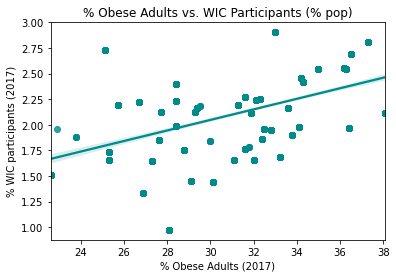

In [47]:
# If we look at markers of diabetes and obesity both have a positive association
# with food insecurity and the precense of programs like WIC

fig = plt.figure(figsize=(6, 4))
ax= sns.regplot(df['PCT_OBESE_ADULTS17'], df['PCT_WIC17'], color='darkcyan')
ax.set(title ='% Obese Adults vs. WIC Participants (% pop)',
       xlabel ='% Obese Adults (2017)', ylabel ='% WIC participants (2017)' )

plt.show()

In [ ]:
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)  

In [ ]:
df.columns[29]

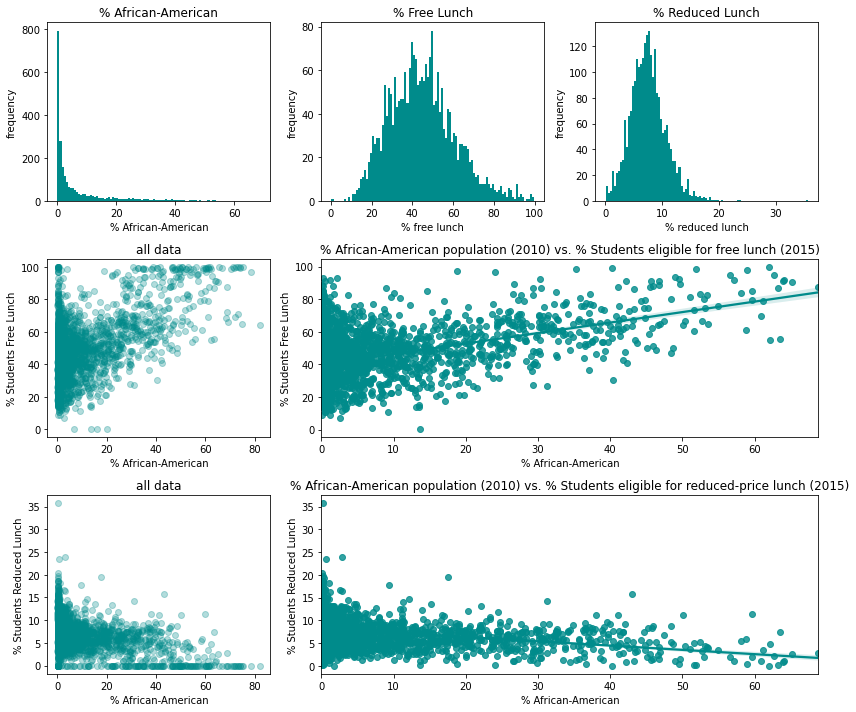

In [49]:
# There is a positive trend between elegibility for free lunches and percent
# of african american population, but negative correlation with 
# reduced lunches. 

fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot2grid((3,3), (0,0)) 
ax2 = plt.subplot2grid((3,3), (0,1))   
ax3 = plt.subplot2grid((3,3), (0,2))
ax4 = plt.subplot2grid((3,3), (1,0))  # 
ax5 = plt.subplot2grid((3,3), (1,1), colspan=2)  
ax6 = plt.subplot2grid((3,3), (2,0))  # 
ax7 = plt.subplot2grid((3,3), (2,1), colspan=2)  

data = df[['PCT_NHBLACK10','PCT_FREE_LUNCH15','PCT_REDUCED_LUNCH15']]
data = data.loc[(data["PCT_REDUCED_LUNCH15"]!=0)]
PCT_NHBLACK10 = df.iloc[:,29]
PCT_FREE_LUNCH15 = df.iloc[:,45]
PCT_REDUCED_LUNCH15 = df.iloc[:,46]

ax1.hist(data['PCT_NHBLACK10'], bins=100,color='darkcyan')
ax1.set(title='% African-American', xlabel='% African-American', ylabel='frequency')

ax2.hist(data['PCT_FREE_LUNCH15'], bins=100,color='darkcyan')
ax2.set(title='% Free Lunch', xlabel='% free lunch', ylabel='frequency')

ax3.hist(data['PCT_REDUCED_LUNCH15'], bins=100,color='darkcyan')
ax3.set(title='% Reduced Lunch', xlabel='% reduced lunch', ylabel='frequency')

ax4.scatter(PCT_NHBLACK10, PCT_FREE_LUNCH15, color='darkcyan', alpha=0.3)
ax4.set(title='all data', xlabel='% African-American', ylabel='% Students Free Lunch')
sns.regplot(data['PCT_NHBLACK10'], data['PCT_FREE_LUNCH15'],ax=ax5, color='darkcyan')
ax5.set(title='% African-American population (2010) vs. % Students eligible for free lunch (2015)', xlabel='% African-American', ylabel='% Students Free Lunch')

ax6.scatter(PCT_NHBLACK10, PCT_REDUCED_LUNCH15, color='darkcyan', alpha=0.3)
ax6.set(title='all data', xlabel='% African-American', ylabel='% Students Reduced Lunch')
sns.regplot(data['PCT_NHBLACK10'], data['PCT_REDUCED_LUNCH15'],ax=ax7, color='darkcyan')
ax7.set(title='% African-American population (2010) vs. % Students eligible for reduced-price lunch (2015)', xlabel='% African-American', ylabel='% Students Reduced Lunch')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3) 
# save plot
plt.savefig('assets/NHBLACK_FREE_REDUCED.png')

fig.tight_layout()
 
plt.show()

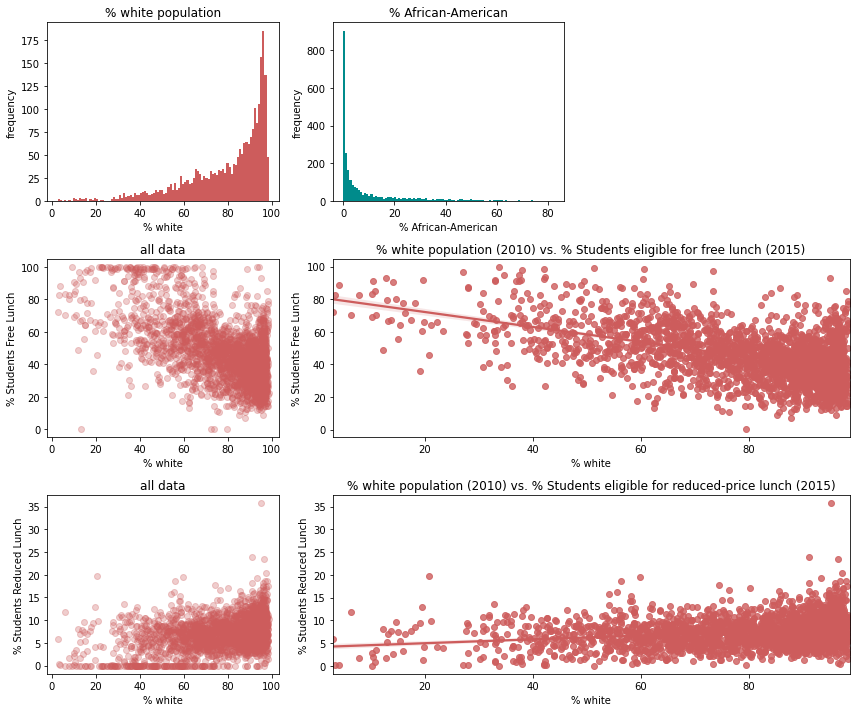

In [52]:
# The higher the percentage of white population the lower the free school lunches. 

fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot2grid((3,3), (0,0)) 
ax2 = plt.subplot2grid((3,3), (0,1))   

ax4 = plt.subplot2grid((3,3), (1,0))  # 
ax5 = plt.subplot2grid((3,3), (1,1), colspan=2)  
ax6 = plt.subplot2grid((3,3), (2,0))  # 
ax7 = plt.subplot2grid((3,3), (2,1), colspan=2)  

data = df[['PCT_NHWHITE10','PCT_FREE_LUNCH15','PCT_REDUCED_LUNCH15']]
data = data.loc[(data["PCT_REDUCED_LUNCH15"]!=0)]
PCT_NHWHITE10 = df.iloc[:,28]
PCT_FREE_LUNCH15 = df.iloc[:,45]
PCT_REDUCED_LUNCH15 = df.iloc[:,46]

ax1.hist(data['PCT_NHWHITE10'], bins=100,color='indianred')
ax1.set(title='% white population', xlabel='% white', ylabel='frequency')

ax2.hist(df['PCT_NHBLACK10'], bins=100,color='darkcyan')
ax2.set(title='% African-American', xlabel='% African-American', ylabel='frequency')

ax4.scatter(PCT_NHWHITE10, PCT_FREE_LUNCH15, color='indianred', alpha=0.3)
ax4.set(title='all data', xlabel='% white', ylabel='% Students Free Lunch')
sns.regplot(data['PCT_NHWHITE10'], data['PCT_FREE_LUNCH15'],ax=ax5, color='indianred')
ax5.set(title='% white population (2010) vs. % Students eligible for free lunch (2015)', xlabel='% white', ylabel='% Students Free Lunch')

ax6.scatter(PCT_NHWHITE10, PCT_REDUCED_LUNCH15, color='indianred', alpha=0.3)
ax6.set(title='all data', xlabel='% white', ylabel='% Students Reduced Lunch')
sns.regplot(data['PCT_NHWHITE10'], data['PCT_REDUCED_LUNCH15'],ax=ax7, color='indianred')
ax7.set(title='% white population (2010) vs. % Students eligible for reduced-price lunch (2015)', xlabel='% white', ylabel='% Students Reduced Lunch')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3) 
# save plot
# plt.savefig('assets/NHWHITE_FREE_REDUCED.png')

fig.tight_layout()
plt.show()


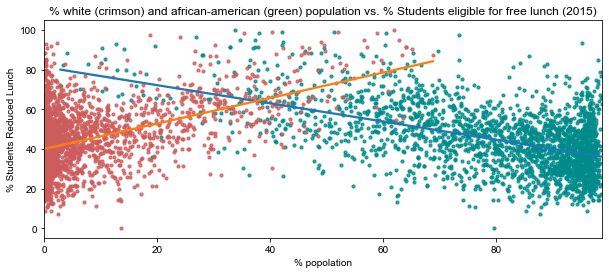

In [53]:
# The higher the percentage of white population the lower the free school lunches. 

fig, ax = plt.subplots(figsize=(10, 4))
data = df[['PCT_NHWHITE10',"PCT_NHBLACK10",'PCT_FREE_LUNCH15','PCT_REDUCED_LUNCH15']]
data = data.loc[(data["PCT_REDUCED_LUNCH15"]!=0)]

# sns.set(color_codes=True)
sns.set_style('whitegrid')
sns.regplot(x=data['PCT_NHWHITE10'],y=data['PCT_FREE_LUNCH15'],
            ax=ax, fit_reg=True, ci = None, 
            scatter_kws={"color": "darkcyan",'s':10})
sns.regplot(x=data['PCT_NHBLACK10'],y=data['PCT_FREE_LUNCH15'],
            ax=ax, fit_reg=True, ci = None, 
            scatter_kws={"color": "indianred",'s':10})

ax.set(title='% white (crimson) and african-american (green) population vs. % Students eligible for free lunch (2015)', xlabel='% popolation', ylabel='% Students Reduced Lunch')

# save plot
# plt.savefig('assets/NHWHITE_BLACK_FREE.png')

plt.show()

## Model and predictions

The following steps in the pipeline will be finding feature that are related.One quick way is to use VIF, variable inflation factors. 
VIF determines the strenght of the correlation between variables. 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df_corr = df[sb2]
X = df_corr.iloc[:,:-1]
calc_vif(X)

Those variables with a coeficient closer to 1 are not correlated with the other variables. The higher the number the higher the collinearity of the particular variable and the rest.
This step will help to eliminate variables and also consider if two variables could be convined.

In [ ]:
df2 = df_corr.copy()
df2['poverty_rate'] = df.apply(lambda x: x['CHILDPOVRATE15'] + x['POVRATE15'],axis=1)
X = df2.drop(['CHILDPOVRATE15','POVRATE15',],axis=1)
calc_vif(X)

## Multiple regression

Idealy a variable like obesity and diabetes can be conbined and used to do a regression with some of the parameters related to cost. 
 
For example, if diabetes and obesity ara positively correlated with low acces to stores then having a better channel for food distribution will have a measurable impact. 



## Model 

To look for a more specific locations one posible approach is using 
few weigthed parameters and set up a system of scores based on the 
quantile distributions of different relevant parameters.

For example, if diabetes and obesity have an association with model child poverty rate, and elegibility to school free lunch those features can be weigthed and fed back to each county to calculate an score base on the deviation to the mean.

The counties with the higher score could be proposed as a condidates for the intervention.

In [56]:
# Bining the cariables of interest 
columns_list = [
    'PCT_OBESE_ADULTS17',
    'PCT_DIABETES_ADULTS13',
    'CHILDPOVRATE15',
    'PCT_FREE_LUNCH15',
    'PCT_NHBLACK10'
]

count = 1

for col in columns_list:
    quartiles = df[col].quantile([1/4,1/2,3/4]) # this are quartiles
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq #interquartile range
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    col_bins = [df[col].min()-1,(quartiles[0.5]), (quartiles[0.75]),(upperq + (1.5*iqr)),df[col].max()+2]
    col_labels=[0,1,4,6]
    name = 'col_' + str(count)
    df[name]= pd.cut(df[col], bins=col_bins,labels=False)
    count +=1

# add the scores

df['sum'] = df['col_1'] + df['col_2'] + df['col_3'] + df['col_4'] + df['col_5']

df.head()

,FIPS,State,County,PCT_OBESE_ADULTS17,PCT_DIABETES_ADULTS13,Total_Actual_Costs,Total_Standardized_Costs,Part_B_Drugs_Per_Capita_Actual_Costs,LACCESS_POP15,PCT_LACCESS_POP15,...,SUPERCPTH16,FMRKT18,FMRKTPTH18,PCT_FMRKT_FRVEG18,col_1,col_2,col_3,col_4,col_5,sum
1,1003,AL,Baldwin,36.3,10.4,1.897095e+08,2.088931e+08,242.47,30561.264430,16.767489,...,0.033733,4.0,0.018347,75.0,2,0,0,0,1,3
2,1005,AL,Barbour,36.3,18.4,3.193050e+07,3.526400e+07,294.75,6069.523628,22.105560,...,0.038799,4.0,0.160765,50.0,2,3,2,2,3,12
3,1007,AL,Bibb,36.3,14.8,2.286629e+07,2.412254e+07,300.89,969.378841,4.230324,...,0.044183,1.0,0.044643,0.0,2,2,2,1,2,9
4,1009,AL,Blount,36.3,14.1,4.658631e+07,4.932581e+07,275.58,3724.428242,6.497380,...,0.017373,1.0,0.017289,100.0,2,2,1,1,0,6
6,1013,AL,Butler,36.3,17.7,3.570503e+07,3.812505e+07,281.81,1304.328756,6.226805,...,0.050088,2.0,0.101626,50.0,2,3,2,2,3,12


In [58]:
# create a risk score 

risk_bins = [-1,6,10,12,15]
group_names = ['lowest (<6)', 'low (6-10)', 'high (10-12)', 'highest (12-15)']

df['risk score'] = pd.cut(df['sum'], risk_bins, labels= group_names)

[Text(0, 0.5, '% pop'),
 Text(0.5, 0, 'risk score'),
 Text(0.5, 1.0, '% hispano population')]

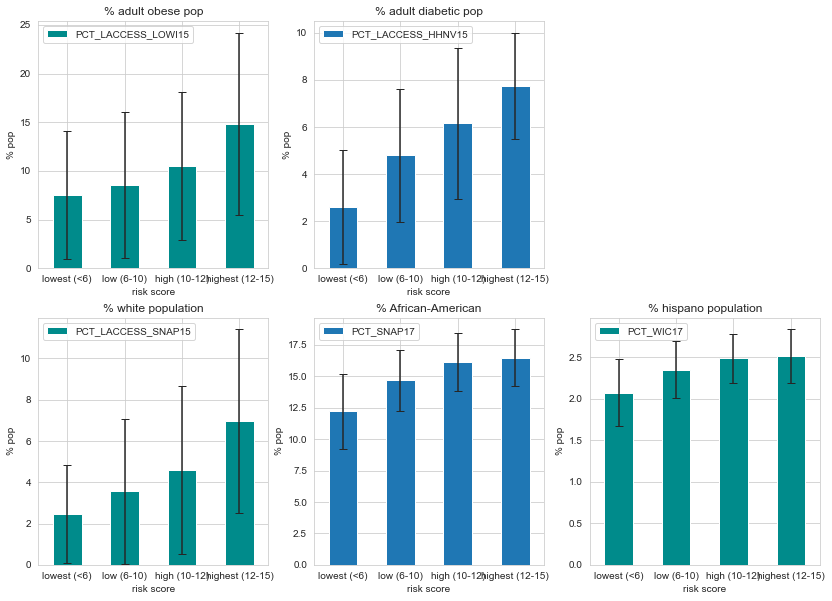

In [60]:
risk_score = df.groupby('risk score')
means_risk = risk_score.mean()
errors_risk = risk_score.std()

fig, ax = plt.subplots(figsize=(14, 10))

ax1 = plt.subplot2grid((2,3), (0,0)) 
ax2 = plt.subplot2grid((2,3), (0,1)) 

ax4 = plt.subplot2grid((2,3), (1,0)) 
ax5 = plt.subplot2grid((2,3), (1,1)) 
ax6 = plt.subplot2grid((2,3), (1,2)) 

means_risk.plot.bar(yerr=errors_risk, y='PCT_LACCESS_LOWI15', ax=ax1, capsize=4, rot=0,color='darkcyan');
ax1.set(title='% adult obese pop', xlabel='risk score', ylabel='% pop')
means_risk.plot.bar(yerr=errors_risk, y='PCT_LACCESS_HHNV15', ax=ax2, capsize=4, rot=0);
ax2.set(title='% adult diabetic pop', xlabel='risk score', ylabel='% pop')

means_risk.plot.bar(yerr=errors_risk, y='PCT_LACCESS_SNAP15', ax=ax4, capsize=4, rot=0,color='darkcyan');
ax4.set(title='% white population', xlabel='risk score', ylabel='% pop')
means_risk.plot.bar(yerr=errors_risk, y='PCT_SNAP17', ax=ax5, capsize=4, rot=0);
ax5.set(title='% African-American', xlabel='risk score', ylabel='% pop')
means_risk.plot.bar(yerr=errors_risk, y='PCT_WIC17', ax=ax6, capsize=4, rot=0,color='darkcyan');
ax6.set(title='% hispano population', xlabel='risk score', ylabel='% pop')

[Text(0, 0.5, '% pop'),
 Text(0.5, 0, 'risk score'),
 Text(0.5, 1.0, '% hispano population')]

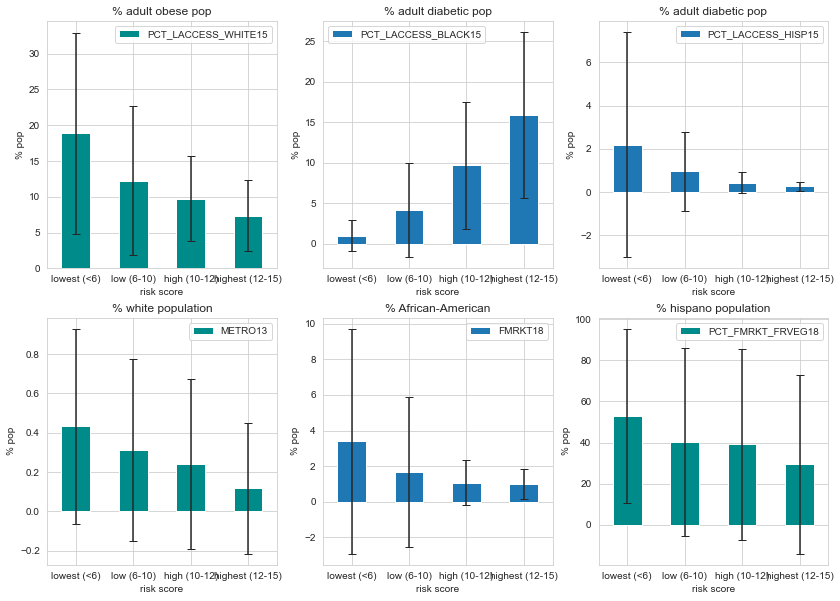

In [61]:

fig, ax = plt.subplots(2,3, figsize=(14, 10))
ax1 = plt.subplot2grid((2,3), (0,0)) 
ax2 = plt.subplot2grid((2,3), (0,1)) 
ax3 = plt.subplot2grid((2,3), (0,2))
ax4 = plt.subplot2grid((2,3), (1,0)) 
ax5 = plt.subplot2grid((2,3), (1,1)) 
ax6 = plt.subplot2grid((2,3), (1,2)) 

means_risk.plot.bar(yerr=errors_risk, y= 'PCT_LACCESS_WHITE15', ax=ax1, capsize=4, rot=0,color='darkcyan');
ax1.set(title='% adult obese pop', xlabel='risk score', ylabel='% pop')
means_risk.plot.bar(yerr=errors_risk, y='PCT_LACCESS_BLACK15', ax=ax2, capsize=4, rot=0);
ax2.set(title='% adult diabetic pop', xlabel='risk score', ylabel='% pop')
means_risk.plot.bar(yerr=errors_risk, y='PCT_LACCESS_HISP15', ax=ax3, capsize=4, rot=0);
ax3.set(title='% adult diabetic pop', xlabel='risk score', ylabel='% pop')


means_risk.plot.bar(yerr=errors_risk, y='METRO13', ax=ax4, capsize=4, rot=0,color='darkcyan');
ax4.set(title='% white population', xlabel='risk score', ylabel='% pop')
means_risk.plot.bar(yerr=errors_risk, y='FMRKT18', ax=ax5, capsize=4, rot=0);
ax5.set(title='% African-American', xlabel='risk score', ylabel='% pop')
means_risk.plot.bar(yerr=errors_risk, y='PCT_FMRKT_FRVEG18', ax=ax6, capsize=4, rot=0,color='darkcyan');
ax6.set(title='% hispano population', xlabel='risk score', ylabel='% pop')

## Geographical locations

The counties with the higher score could be proposed as a condidates for the intervention.

In [62]:
# states_risk = df.groupby('State')['risk score'].count().sort_values(ascending = False)
states_risk = df.groupby('risk score')['State'].count()
print(states_risk)

risk score
lowest (<6)        2000
low (6-10)          463
high (10-12)         87
highest (12-15)      17
Name: State, dtype: int64


In [63]:
states_risk1=df[['FIPS','State','County']].loc[df['risk score'] == 'highest (12-15)']

states_risk1

,FIPS,State,County
23,1047,AL,Dallas
52,1105,AL,Perry
65,1131,AL,Wilcox
146,5077,AR,Lee
161,5107,AR,Phillips
1142,22067,LA,Morehouse
1162,22107,LA,Tensas
1410,28027,MS,Coahoma
1423,28053,MS,Humphreys
1448,28103,MS,Noxubee
